In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.random import set_seed

import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pickle

In [4]:
# Defining a results visualization function
def visualize_training_results(history):
    '''
    From https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
    
    Input: keras history object (output from trained model)
    '''
    fig, (ax1, ax2) = plt.subplots(2, figsize=(8,8), sharex=True)
    fig.suptitle('Model Results')

    # summarize history for accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_ylabel('Accuracy')
    ax1.legend(['train', 'test'], loc='upper left')
    # summarize history for loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_ylabel('Loss')
    ax2.legend(['train', 'test'], loc='upper left')
    
    plt.xlabel('Epoch')
    plt.show()

In [5]:
with open('/content/drive/MyDrive/Colab Notebooks/mel_spec_sc.pkl', 'rb') as up:
    mel_spec_sc = pickle.load(up)
X_train, y_train = mel_spec_sc['X_train'][0], mel_spec_sc['X_train'][1]
X_test, y_test = mel_spec_sc['X_test'][0], mel_spec_sc['X_test'][1]
X_holdout, y_holdout = mel_spec_sc['X_holdout'][0], mel_spec_sc['X_holdout'][1]

### First Model - Multilayer Perceptron

In [6]:
input_shape = X_train.shape[1:]
batch_size = X_train.shape[0]/100

In [11]:
input_shape

(128, 1292, 1)

In [ ]:
# set random seed for reproducibility
np.random.seed(42)
set_seed(42)

# build sequentially
mlp = keras.Sequential(name='mlp')

# flatten input 3D tensor to 1D
mlp.add(layers.Flatten(input_shape=input_shape))

# two hidden layers
mlp.add(layers.Dense(128, activation='relu'))
mlp.add(layers.Dense(64, activation='relu'))

# output layer
mlp.add(layers.Dense(1, activation='sigmoid'))

# compile cnn
mlp.compile(loss='binary_crossentropy',
            optimizer="adam",
            metrics=['accuracy', 'Recall'])

# take a look at model architecture
mlp.summary()

Model: "mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 165376)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               21168256  
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 21,176,577
Trainable params: 21,176,577
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fsm_history = mlp.fit(X_train, y_train, epochs=60, batch_size=30,
                  validation_data=(X_test, y_test))

Epoch 1/60
346/346 [==============================] - 15s 39ms/step - loss: 2.5842 - accuracy: 0.4952 - recall: 0.4904 - val_loss: 1.5612 - val_accuracy: 0.5161 - val_recall: 0.0000e+00
Epoch 2/60
346/346 [==============================] - 14s 41ms/step - loss: 0.8632 - accuracy: 0.4939 - recall: 0.4727 - val_loss: 0.7065 - val_accuracy: 0.4885 - val_recall: 0.9991
Epoch 3/60
346/346 [==============================] - 14s 41ms/step - loss: 0.7371 - accuracy: 0.5040 - recall: 0.4894 - val_loss: 0.7026 - val_accuracy: 0.5161 - val_recall: 0.0000e+00
Epoch 4/60
346/346 [==============================] - 14s 41ms/step - loss: 0.7106 - accuracy: 0.5095 - recall: 0.4975 - val_loss: 0.6937 - val_accuracy: 0.4893 - val_recall: 0.9991
Epoch 5/60
346/346 [==============================] - 14s 41ms/step - loss: 0.7029 - accuracy: 0.4978 - recall: 0.4389 - val_loss: 0.6921 - val_accuracy: 0.5227 - val_recall: 0.9157
Epoch 6/60
346/346 [==============================] - 14s 41ms/step - loss: 0.7130

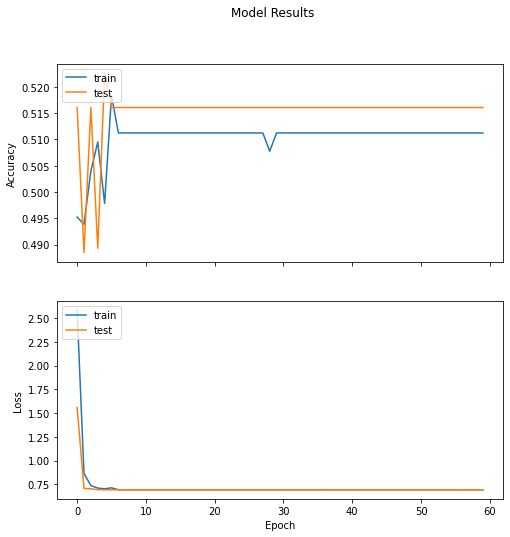

In [ ]:
visualize_training_results(fsm_history)

## CNN

In [ ]:
# set random seed for reproducibility
np.random.seed(42)
set_seed(42)

# build sequentially
cnn1 = keras.Sequential(name='cnn1')

# convolutional and max pooling layers with successively more filters
cnn1.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_shape))
cnn1.add(layers.MaxPooling2D((2, 4)))

cnn1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn1.add(layers.MaxPooling2D((2, 4)))

cnn1.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn1.add(layers.MaxPooling2D((2, 2)))

cnn1.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn1.add(layers.MaxPool2D((2, 2)))

# fully-connected layers for output
cnn1.add(layers.Flatten())
cnn1.add(layers.Dense(128, activation='relu'))
cnn1.add(layers.Dropout(0.3))
cnn1.add(layers.Dense(64, activation='relu'))
cnn1.add(layers.Dropout(0.3))

# output layer
cnn1.add(layers.Dense(1, activation='sigmoid'))

# compile cnn
cnn1.compile(loss='binary_crossentropy',
            optimizer="adam",
            metrics=['accuracy', 'Recall'])

# take a look at model architecture
cnn1.summary()

Model: "cnn1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 1292, 16)     160       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 323, 16)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 323, 32)       4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 80, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 80, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 40, 64)       0      

In [ ]:
cnn1_history = cnn1.fit(X_train, y_train, epochs=60, batch_size=100,
                  validation_data=(X_test, y_test))

Epoch 1/60
104/104 [==============================] - 191s 2s/step - loss: 0.6937 - accuracy: 0.5081 - recall: 0.0949 - val_loss: 0.6926 - val_accuracy: 0.5161 - val_recall: 0.0000e+00
Epoch 2/60
104/104 [==============================] - 190s 2s/step - loss: 0.6930 - accuracy: 0.5074 - recall: 0.0497 - val_loss: 0.6929 - val_accuracy: 0.5161 - val_recall: 0.0000e+00
Epoch 3/60
104/104 [==============================] - 177s 2s/step - loss: 0.6932 - accuracy: 0.5114 - recall: 0.0026 - val_loss: 0.6928 - val_accuracy: 0.5161 - val_recall: 0.0000e+00
Epoch 4/60
104/104 [==============================] - 166s 2s/step - loss: 0.6929 - accuracy: 0.5112 - recall: 7.8942e-04 - val_loss: 0.6927 - val_accuracy: 0.5161 - val_recall: 0.0000e+00
Epoch 5/60
104/104 [==============================] - 162s 2s/step - loss: 0.6930 - accuracy: 0.5112 - recall: 0.0000e+00 - val_loss: 0.6927 - val_accuracy: 0.5161 - val_recall: 0.0000e+00
Epoch 6/60
104/104 [==============================] - 162s 2s/step 

KeyboardInterrupt: ignored

In [ ]:
# set random seed for reproducibility
np.random.seed(42)
set_seed(42)

# build sequentially
cnn2 = keras.Sequential(name='cnn2')

# convolutional and max pooling layers with successively more filters
cnn2.add(layers.Conv2D(32, (2, 3), activation='relu', padding='same', input_shape=input_shape))
cnn2.add(layers.MaxPooling2D((2, 4)))

cnn2.add(layers.Conv2D(64, (2, 3), activation='relu', padding='same'))
cnn2.add(layers.MaxPooling2D((2, 4)))

cnn2.add(layers.Conv2D(128, (2, 3), activation='relu', padding='same'))
cnn2.add(layers.MaxPooling2D((2, 2)))

cnn2.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn2.add(layers.MaxPool2D((2, 2)))

# fully-connected layers for output
cnn2.add(layers.Flatten())
cnn2.add(layers.Dense(128, activation='relu'))
# cnn2.add(layers.Dropout(0.3))
# cnn2.add(layers.Dense(64, activation='relu'))
# cnn2.add(layers.Dropout(0.3))

# output layer
cnn2.add(layers.Dense(1, activation='sigmoid'))

# compile cnn
cnn2.compile(loss='binary_crossentropy',
            optimizer="adam",
            metrics=['accuracy', 'Recall'])

# take a look at model architecture
cnn2.summary()

Model: "cnn2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 128, 1292, 32)     224       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 64, 323, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 64, 323, 64)       12352     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 32, 80, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 80, 128)       49280     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 16, 40, 128)      0      

In [ ]:
cnn2_history = cnn2.fit(X_train, y_train, epochs=60, batch_size=100,
                  validation_data=(X_test, y_test))

 51/104 [=============>................] - ETA: 1:52 - loss: 0.4188 - accuracy: 0.7971 - recall: 0.8107

KeyboardInterrupt: ignored

In [ ]:
visualize_training_results(cnn2_history)

NameError: ignored

In [1]:
# set random seed for reproducibility
np.random.seed(42)
set_seed(42)

# build sequentially
cnn3 = keras.Sequential(name='cnn3')

# convolutional and max pooling layers with successively more filters
cnn3.add(layers.Conv2D(32, (2, 3), activation='relu', padding='same', input_shape=input_shape))
cnn3.add(layers.MaxPooling2D((2, 4)))

cnn3.add(layers.Conv2D(64, (2, 3), activation='relu', padding='same'))
cnn3.add(layers.MaxPooling2D((2, 4)))

cnn3.add(layers.Conv2D(128, (2, 3), activation='relu', padding='same'))
cnn3.add(layers.MaxPooling2D((2, 2)))

cnn3.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn3.add(layers.MaxPool2D((2, 2)))

# fully-connected layers for output
cnn3.add(layers.Flatten())
cnn3.add(layers.Dense(128, activation='relu'))
cnn3.add(layers.Dropout(0.3))
cnn3.add(layers.Dense(64, activation='relu'))
cnn3.add(layers.Dropout(0.3))

# output layer
cnn3.add(layers.Dense(1, activation='sigmoid'))

# compile cnn
cnn3.compile(loss='binary_crossentropy',
            optimizer="adam",
            metrics=['accuracy', 'Recall'])

# take a look at model architecture
cnn3.summary()

NameError: ignored

In [ ]:
cnn3_history = cnn3.fit(X_train, y_train, epochs=120, batch_size=100,
                  validation_data=(X_test, y_test))

Epoch 1/120
104/104 [==============================] - 235s 2s/step - loss: 0.6933 - accuracy: 0.5073 - recall: 0.2368 - val_loss: 0.6938 - val_accuracy: 0.5161 - val_recall: 0.0000e+00
Epoch 2/120
104/104 [==============================] - 239s 2s/step - loss: 0.6930 - accuracy: 0.5070 - recall: 0.0967 - val_loss: 0.6932 - val_accuracy: 0.4839 - val_recall: 1.0000
Epoch 3/120
104/104 [==============================] - 231s 2s/step - loss: 0.6933 - accuracy: 0.5126 - recall: 0.0857 - val_loss: 0.6928 - val_accuracy: 0.5161 - val_recall: 0.0000e+00
Epoch 4/120
104/104 [==============================] - 230s 2s/step - loss: 0.6931 - accuracy: 0.5116 - recall: 0.0020 - val_loss: 0.6927 - val_accuracy: 0.5161 - val_recall: 0.0000e+00
Epoch 5/120
104/104 [==============================] - 231s 2s/step - loss: 0.6929 - accuracy: 0.5115 - recall: 0.0022 - val_loss: 0.6927 - val_accuracy: 0.5161 - val_recall: 0.0000e+00
Epoch 6/120
104/104 [==============================] - 233s 2s/step - loss

In [8]:
visualize_training_results(cnn3_history)

NameError: ignored

## RNN

In [23]:
# set random seed for reproducibility
np.random.seed(42)
set_seed(42)

# build sequentially
rnn = keras.Sequential(name='rnn')

# convolutional and max pooling layers with successively more filters
rnn.add(layers.Conv2D(64, (3, 3), activation='elu', padding='same', input_shape=(128, 1292, 1)))
rnn.add(layers.MaxPooling2D((2, 2)))
rnn.add(layers.Dropout(0.1))

rnn.add(layers.Conv2D(128, (3, 3), activation='elu', padding='same'))
rnn.add(layers.MaxPooling2D((4, 2)))
rnn.add(layers.Dropout(0.1))

rnn.add(layers.Conv2D(128, (3, 3), activation='elu', padding='same'))
rnn.add(layers.MaxPooling2D((4, 2)))
rnn.add(layers.Dropout(0.1))

rnn.add(layers.Conv2D(128, (3, 3), activation='elu', padding='same'))
rnn.add(layers.MaxPool2D((4, 2)))
rnn.add(layers.Dropout(0.1))

rnn.add(layers.Reshape((80,128)))
rnn.add(layers.GRU(units=32, dropout=0.3, return_sequences=True))
rnn.add(layers.GRU(units=32, dropout=0.3))

# output layer
rnn.add(layers.Dense(1, activation='sigmoid'))

# compile cnn
rnn.compile(loss='binary_crossentropy',
            optimizer="adam", 
            metrics=['accuracy', 'Recall'])

# take a look at model architecture
rnn.summary()

Model: "rnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 128, 1292, 64)     640       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 64, 646, 64)      0         
 g2D)                                                            
                                                                 
 dropout_43 (Dropout)        (None, 64, 646, 64)       0         
                                                                 
 conv2d_45 (Conv2D)          (None, 64, 646, 128)      73856     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 16, 323, 128)     0         
 g2D)                                                            
                                                                 
 dropout_44 (Dropout)        (None, 16, 323, 128)      0       

In [ ]:
rnn_history = rnn.fit(X_train, y_train, epochs=100, batch_size=100,
                  validation_data=(X_test, y_test))

Epoch 1/100
104/104 [==============================] - 1023s 10s/step - loss: 0.6970 - accuracy: 0.5051 - recall: 0.3734 - val_loss: 0.6913 - val_accuracy: 0.5223 - val_recall: 0.2223
Epoch 2/100
104/104 [==============================] - 991s 10s/step - loss: 0.6932 - accuracy: 0.5156 - recall: 0.3278 - val_loss: 0.6940 - val_accuracy: 0.5161 - val_recall: 0.0000e+00
Epoch 3/100
104/104 [==============================] - 997s 10s/step - loss: 0.6932 - accuracy: 0.5153 - recall: 0.3233 - val_loss: 0.6908 - val_accuracy: 0.5161 - val_recall: 0.0000e+00
Epoch 4/100
104/104 [==============================] - 998s 10s/step - loss: 0.6906 - accuracy: 0.5260 - recall: 0.4703 - val_loss: 0.6883 - val_accuracy: 0.5289 - val_recall: 0.5945
Epoch 5/100
104/104 [==============================] - 1022s 10s/step - loss: 0.6881 - accuracy: 0.5328 - recall: 0.4604 - val_loss: 0.6876 - val_accuracy: 0.5317 - val_recall: 0.0792
Epoch 6/100
104/104 [==============================] - 983s 9s/step - loss:

In [1]:
 visualize_training_results(rnn_history)

NameError: ignored